In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import nltk

In [87]:
commentsData = pd.read_csv('data/CommentsMarch2017.csv')

/Users/hollybaker/PycharmProjects/commentScrapper/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: DtypeWarning: Columns (32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
commentsData.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
0,1524345065,5adb8334068401528a2a9f74,1571,"""While Mr. Trump talks a lot about the problem...",26824181.0,26824181.0,<br/>,comment,1524345062,1.0,...,approved,0,0,Editorial,1524345065,Richard Blaine,82512919.0,Not NYC,NaN,NaN
1,1524343706,5adb8334068401528a2a9f74,1571,"From my perspective here in Silicon Valley, pa...",26824061.0,26824061.0,<br/>,comment,1524343701,1.0,...,approved,1,0,Editorial,1524343706,Trista,12815695.0,California,NaN,NaN
2,1524340874,5adb8334068401528a2a9f74,1571,The most important first step political leader...,26823921.0,26823921.0,<br/>,comment,1524340868,1.0,...,approved,1,0,Editorial,1524340874,NM,40118532.0,NY,NaN,NaN
3,1524344994,5adb8331068401528a2a9f70,1221,Thank you for bringing all of these details to...,26824173.0,26824173.0,<br/>,comment,1524344992,1.0,...,approved,1,0,Op-Ed,1524344994,Nils,69117374.0,west coast,NaN,NaN
4,1524344989,5adb8331068401528a2a9f70,1221,Under contract with the Democratic National Co...,26824172.0,26824172.0,<br/>,comment,1524344984,1.0,...,approved,1,0,Op-Ed,1524344989,William Case,60790181.0,United States,NaN,NaN


In [89]:
commentsData.tail()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,...,status,timespeople,trusted,typeOfMaterial,updateDate,userDisplayName,userID,userLocation,userTitle,userURL
260962,1490215123,58d194d27c459f247805d2e4,875,Agree completely with soccerbeckett - saw it a...,21889256.0,21889256.0,<br/>,comment,1490203509,1.0,...,approved,1,0,Review,1490215123,Diane,56311855.0,SF Bay Area,NaN,NaN
260963,1490194875,58d194d27c459f247805d2e4,875,"I saw this show in Berkeley, CA a few months a...",21881902.0,21881902.0,<br/>,comment,1490154053,1.0,...,approved,1,0,Review,1490194875,soccerbeckett,27943399.0,"richmond, ca",NaN,NaN
260964,1490194875,58d194d27c459f247805d2e4,875,We saw the play at he Berkeley Rep Theater a f...,21881713.0,21881713.0,<br/>,comment,1490152562,1.0,...,approved,1,0,Review,1490194875,DAK,46626973.0,CA,NaN,NaN
260965,1490194875,58d194d27c459f247805d2e4,875,"Oh, this one is heading for Broadway ... one c...",21880992.0,21880992.0,<br/>,comment,1490145245,1.0,...,approved,1,0,Review,1490194875,Chris,16388355.0,Maryland,NaN,NaN
260966,1490194875,58d194d27c459f247805d2e4,875,Wanted to like this more than I did...,21880565.0,21880565.0,<br/>,comment,1490141085,1.0,...,approved,1,0,Review,1490194875,Dale Hopson,58399928.0,NYC,NaN,NaN


In [90]:
commentsData.shape

(260967, 34)

In [91]:
commentsData.describe()

,approveDate,articleWordCount,commentID,commentSequence,createDate,depth,inReplyTo,parentID,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sharing,timespeople,trusted,updateDate,userID
count,2.609670e+05,260967.000000,2.609670e+05,2.609670e+05,2.609670e+05,260967.000000,2.609670e+05,2.609670e+05,260967.000000,260967.000000,0.0,260967.000000,0.0,260967.000000,260967.000000,260967.000000,2.609670e+05,2.609670e+05
mean,1.489920e+09,1237.675541,2.185600e+07,2.185600e+07,1.489909e+09,1.275690,6.021093e+06,6.021177e+06,9.937080,21.351497,NaN,0.408695,NaN,0.089119,0.999563,0.036016,1.489922e+09,4.909791e+07
std,2.492871e+06,828.856092,3.558737e+05,3.558737e+05,2.491811e+06,0.447171,9.764607e+06,9.764648e+06,11.411262,124.510860,NaN,2.140233,NaN,0.284915,0.020896,0.186330,2.493138e+06,2.308243e+07
min,1.488338e+09,26.000000,2.164316e+07,2.164316e+07,1.488338e+09,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,1.488338e+09,1.072000e+03
25%,1.489008e+09,822.000000,2.174018e+07,2.174018e+07,1.489005e+09,1.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1.489008e+09,3.182937e+07
50%,1.489719e+09,1116.000000,2.183114e+07,2.183114e+07,1.489713e+09,1.000000,0.000000e+00,0.000000e+00,1.000000,3.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1.489731e+09,5.688263e+07
75%,1.490440e+09,1401.000000,2.192288e+07,2.192288e+07,1.490406e+09,2.000000,2.167837e+07,2.167837e+07,22.000000,10.000000,NaN,0.000000,NaN,0.000000,1.000000,0.000000,1.490441e+09,6.707337e+07
max,1.524347e+09,7834.000000,2.682438e+07,2.682438e+07,1.524347e+09,3.000000,2.682422e+07,2.682422e+07,94.000000,8514.000000,NaN,239.000000,NaN,1.000000,1.000000,1.000000,1.524347e+09,8.572519e+07


In [92]:
commentsData.columns

Index(['approveDate', 'articleID', 'articleWordCount', 'commentBody',
       'commentID', 'commentSequence', 'commentTitle', 'commentType',
       'createDate', 'depth', 'editorsSelection', 'inReplyTo', 'newDesk',
       'parentID', 'parentUserDisplayName', 'permID', 'picURL', 'printPage',
       'recommendations', 'recommendedFlag', 'replyCount', 'reportAbuseFlag',
       'sectionName', 'sharing', 'status', 'timespeople', 'trusted',
       'typeOfMaterial', 'updateDate', 'userDisplayName', 'userID',
       'userLocation', 'userTitle', 'userURL'],
      dtype='object')

In [93]:
commentsData.nunique()

approveDate              115903
articleID                   949
articleWordCount            737
commentBody              260209
commentID                260967
commentSequence          260967
commentTitle                  1
commentType                   3
createDate               243523
depth                         3
editorsSelection              2
inReplyTo                 42496
newDesk                      28
parentID                  42497
parentUserDisplayName     15605
permID                   260967
picURL                     4318
printPage                    46
recommendations            1511
recommendedFlag               0
replyCount                   87
reportAbuseFlag               0
sectionName                  36
sharing                       2
status                        1
timespeople                   2
trusted                       2
typeOfMaterial               11
updateDate               120949
userDisplayName           45556
userID                    62044
userLoca

In [94]:
commentsData['newDesk'].unique()

array(['Editorial', 'OpEd', 'Games', 'Investigative', 'Foreign',
       'RealEstate', 'NewsDesk', 'Culture', 'Unknown', 'Metro',
       'Business', 'Dining', 'National', 'Learning', 'Magazine', 'Travel',
       'Sports', 'Well', 'Science', 'Upshot', 'Insider', 'Weekend',
       'Metropolitan', 'Styles', 'SpecialSections', 'SundayBusiness',
       'Summary', 'Arts&Leisure'], dtype=object)

In [95]:
commentsData['typeOfMaterial'].unique()

array(['Editorial', 'Op-Ed', 'News', 'Blog', 'Review', 'Question',
       'briefing', 'Brief', 'News Analysis', 'Letter', 'Obituary (Obit)'],
      dtype=object)

In [96]:
commentsData['trusted'].unique()

array([0, 1])

In [97]:
commentsData['commentType'].unique()

array(['comment', 'userReply', 'reporterReply'], dtype=object)

In [98]:
commentsData['commentTitle'].unique()

array(['<br/>', nan], dtype=object)

In [99]:
commentsData['depth'].unique()

array([1., 2., 3.])

In [100]:
commentsData['replyCount'].unique()

array([  0,   1,   2,   6,   3,   7,   5,   4,  18,   8,   9,  23,  31,
        10,  13,  16,  15,  41,  12,  28,  29,  17,  11,  14,  30,  45,
        25,  20,  22,  27,  32,  19,  81,  24,  43, 130,  39,  62,  48,
        21,  47,  26,  42,  75,  34,  37,  50,  53,  57,  46,  63, 118,
        35,  78, 198, 129,  56,  67,  74, 104,  33, 124,  66,  58,  36,
        40,  44,  49,  59, 187, 114,  65, 103,  61, 223,  51,  76,  60,
       109,  91,  64,  86,  90, 237, 239,  38,  77])

In [101]:
commentsData['sectionName'].unique()

array(['Sunday Review', 'Unknown', 'Politics', 'Asia Pacific', 'Baseball',
       'Mind', 'Move', 'Golf', 'Eat', 'Live', 'Lesson Plans',
       'Television', 'Family', 'DealBook', "401(k)'s and Similar Plans",
       'Retirement', 'Economy', 'Africa', 'Soccer', 'Pro Basketball',
       'Europe', 'Rugby', 'College Basketball', 'Middle East',
       'Pro Football', 'Energy & Environment ', 'Art & Design',
       'Personal Tech', 'College Football', 'Music', 'Media', 'Hockey',
       'Paying for College', 'Olympics', 'Tennis', 'Insider Events'],
      dtype=object)

In [102]:
commentsData['sharing'].unique()

array([0, 1])

In [103]:
commentsData['status'].unique()

array(['approved'], dtype=object)

In [104]:
commentsData['timespeople'].unique()

array([0, 1])

In [105]:
commentsData['userTitle'].unique()

array([nan, 'International Correspondent, The New York Times',
       'The Learning Network', 'Staff Editor, The Learning Network',
       'Your Money columnist', 'Staff Editor, The New York Times',
       'The New York Times', 'New Old Age columnist',
       'Senior Staff Editor, The New York Times',
       'Assistant Metro Editor', 'reporter', 'Public Editor'],
      dtype=object)

In [106]:
commentsData['userURL'].unique()

array([nan, 'https://www.nytimes.com/by/rod-nordland',
       'https://www.nytimes.com/by/stephen-hiltner',
       'http://www.nytimes.com/column/the-walking-dead-tv-recaps'],
      dtype=object)

In [107]:
commentsData.isnull().sum()

approveDate                   0
articleID                     0
articleWordCount              0
commentBody                   0
commentID                     0
commentSequence               0
commentTitle              16089
commentType                   0
createDate                    0
depth                         0
editorsSelection              0
inReplyTo                     0
newDesk                       0
parentID                      0
parentUserDisplayName    189100
permID                        0
picURL                        0
printPage                     0
recommendations               0
recommendedFlag          260967
replyCount                    0
reportAbuseFlag          260967
sectionName                   0
sharing                       0
status                        0
timespeople                   0
trusted                       0
typeOfMaterial                0
updateDate                    0
userDisplayName              79
userID                        0
userLoca

In [108]:
noNullData = commentsData.drop(['commentTitle', 'parentUserDisplayName', 'recommendedFlag', 'reportAbuseFlag', 'userDisplayName', 'userLocation', 'userTitle', 'userURL'], axis=1)
noNullData.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentType,createDate,depth,editorsSelection,...,recommendations,replyCount,sectionName,sharing,status,timespeople,trusted,typeOfMaterial,updateDate,userID
0,1524345065,5adb8334068401528a2a9f74,1571,"""While Mr. Trump talks a lot about the problem...",26824181.0,26824181.0,comment,1524345062,1.0,False,...,0,0,Sunday Review,0,approved,0,0,Editorial,1524345065,82512919.0
1,1524343706,5adb8334068401528a2a9f74,1571,"From my perspective here in Silicon Valley, pa...",26824061.0,26824061.0,comment,1524343701,1.0,False,...,1,0,Sunday Review,0,approved,1,0,Editorial,1524343706,12815695.0
2,1524340874,5adb8334068401528a2a9f74,1571,The most important first step political leader...,26823921.0,26823921.0,comment,1524340868,1.0,False,...,2,0,Sunday Review,0,approved,1,0,Editorial,1524340874,40118532.0
3,1524344994,5adb8331068401528a2a9f70,1221,Thank you for bringing all of these details to...,26824173.0,26824173.0,comment,1524344992,1.0,False,...,8,0,Sunday Review,0,approved,1,0,Op-Ed,1524344994,69117374.0
4,1524344989,5adb8331068401528a2a9f70,1221,Under contract with the Democratic National Co...,26824172.0,26824172.0,comment,1524344984,1.0,False,...,0,1,Sunday Review,0,approved,1,0,Op-Ed,1524344989,60790181.0


In [109]:
comments = noNullData.drop(['approveDate','commentSequence', 'status', 'updateDate', 'sharing', 'depth', 'timespeople', 'permID', 'picURL', 'printPage'],axis=1)
comments.head()

,articleID,articleWordCount,commentBody,commentID,commentType,createDate,editorsSelection,inReplyTo,newDesk,parentID,recommendations,replyCount,sectionName,trusted,typeOfMaterial,userID
0,5adb8334068401528a2a9f74,1571,"""While Mr. Trump talks a lot about the problem...",26824181.0,comment,1524345062,False,0,Editorial,0.0,0,0,Sunday Review,0,Editorial,82512919.0
1,5adb8334068401528a2a9f74,1571,"From my perspective here in Silicon Valley, pa...",26824061.0,comment,1524343701,False,0,Editorial,0.0,1,0,Sunday Review,0,Editorial,12815695.0
2,5adb8334068401528a2a9f74,1571,The most important first step political leader...,26823921.0,comment,1524340868,False,0,Editorial,0.0,2,0,Sunday Review,0,Editorial,40118532.0
3,5adb8331068401528a2a9f70,1221,Thank you for bringing all of these details to...,26824173.0,comment,1524344992,False,0,OpEd,0.0,8,0,Sunday Review,0,Op-Ed,69117374.0
4,5adb8331068401528a2a9f70,1221,Under contract with the Democratic National Co...,26824172.0,comment,1524344984,False,0,OpEd,0.0,0,1,Sunday Review,0,Op-Ed,60790181.0


<AxesSubplot:xlabel='articleWordCount'>

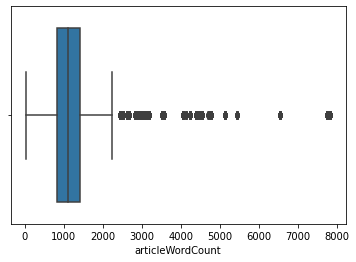

In [110]:
sns.boxplot(x=comments['articleWordCount'])

<AxesSubplot:xlabel='recommendations'>

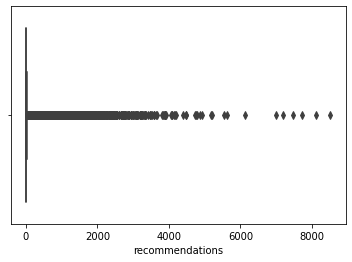

In [111]:
sns.boxplot(x=comments['recommendations'])

<AxesSubplot:xlabel='replyCount'>

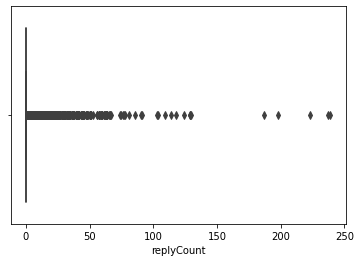

In [112]:
sns.boxplot(x=comments['replyCount'])

In [113]:
z = np.abs(stats.zscore(comments['articleWordCount']))
print(z)

0         0.402151
1         0.402151
2         0.402151
3         0.020119
4         0.020119
            ...   
260962    0.437562
260963    0.437562
260964    0.437562
260965    0.437562
260966    0.437562
Name: articleWordCount, Length: 260967, dtype: float64


In [114]:
threshold = 3
print(np.where(z > 3))

(array([  5064,   5065,   5066, ..., 212640, 212641, 212642]),)


In [115]:
print(comments.iloc[5064])

articleID                      58b69bc07c459f2525d1f24b
articleWordCount                                   4759
commentBody         Going tomorrow night... can't wait!
commentID                                    21710791.0
commentType                                     comment
createDate                                   1488815566
editorsSelection                                  False
inReplyTo                                             0
newDesk                                        Magazine
parentID                                            0.0
recommendations                                       2
replyCount                                            0
sectionName                                     Unknown
trusted                                               0
typeOfMaterial                                     News
userID                                       50572712.0
Name: 5064, dtype: object


In [116]:
correlationC = comments.corr()

<AxesSubplot:>

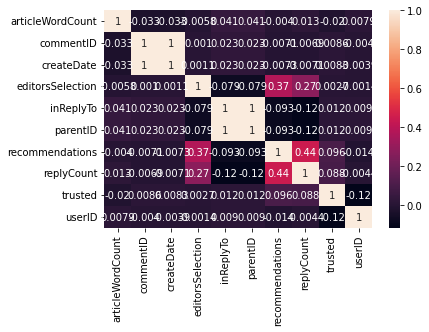

In [117]:
sns.heatmap(correlationC, xticklabels=correlationC.columns, yticklabels=correlationC.columns, annot=True)

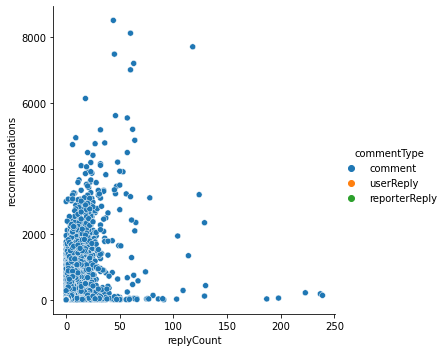

In [118]:
sns.relplot(x= 'replyCount', y= 'recommendations', hue='commentType', data= comments)

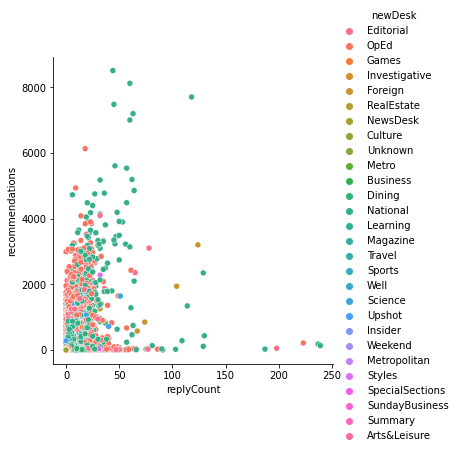

In [119]:
sns.relplot(x= 'replyCount', y= 'recommendations', hue='newDesk', data= comments)

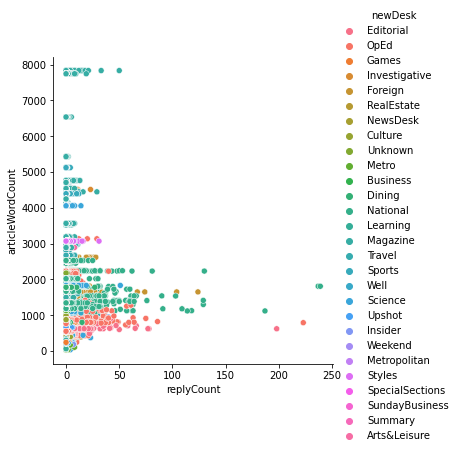

In [120]:
sns.relplot(x= 'replyCount', y= 'articleWordCount', hue='newDesk', data= comments)

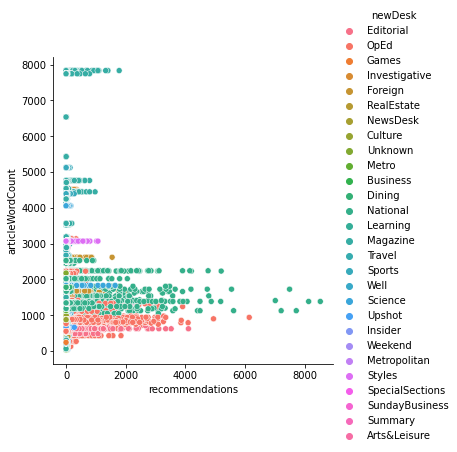

In [121]:
sns.relplot(x= 'recommendations', y= 'articleWordCount', hue='newDesk', data= comments)

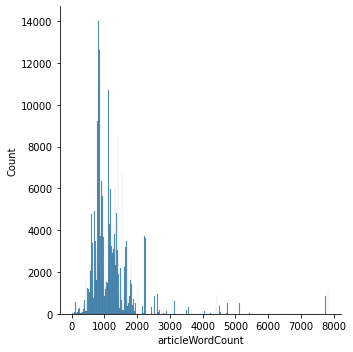

In [122]:
sns.displot(comments['articleWordCount'])

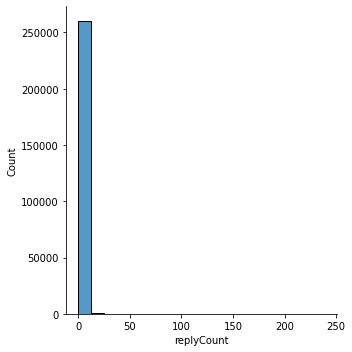

In [123]:
sns.displot(comments['replyCount'])

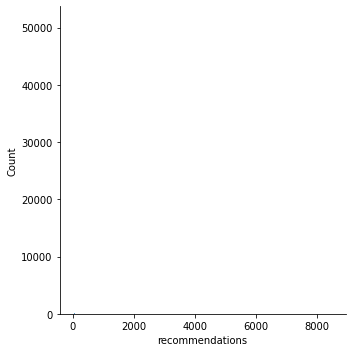

In [124]:
sns.displot(comments['recommendations'])

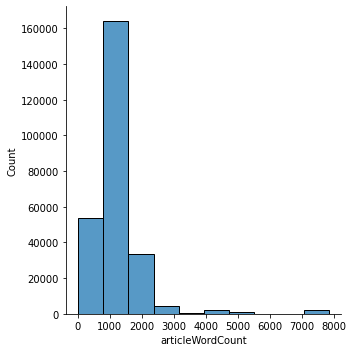

In [125]:
sns.displot(comments['articleWordCount'], bins =10)


In [126]:
articlesData = pd.read_csv('data/ArticlesMarch2017.csv')


In [127]:
articlesData.head()

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
0,NaN,5adb8334068401528a2a9f74,1571,By THE EDITORIAL BOARD,article,The Opioid Crisis Foretold,"['Opioids and Opiates', 'Drug Abuse and Traffi...",68,Editorial,10,2018-04-21 18:30:10,Sunday Review,History supplies precedents and lessons for th...,The New York Times,Editorial,https://www.nytimes.com/2018/04/21/opinion/an-...
1,NaN,5adb8331068401528a2a9f70,1221,By PETER FRITSCH and GLENN R. SIMPSON,article,The Business Deals That Could Imperil Trump,['Russian Interference in 2016 US Elections an...,68,OpEd,3,2018-04-21 18:30:06,Sunday Review,Forget Stormy Daniels. The business records su...,The New York Times,Op-Ed,https://www.nytimes.com/2018/04/21/opinion/sun...
2,NaN,5adb8330068401528a2a9f6f,1465,By CHRISTOPHER A. PREBLE,article,Adapting to American Decline,"['United States International Relations', 'Uni...",68,OpEd,1,2018-04-21 18:30:05,Sunday Review,The United States is losing its influence as i...,The New York Times,Op-Ed,https://www.nytimes.com/2018/04/21/opinion/sun...
3,NaN,5adb8330068401528a2a9f6d,1097,By FRANK BRUNI,article,The Republicans’ Big Senate Mess,"['United States Politics and Government', 'Ele...",67,OpEd,3,2018-04-21 18:30:04,Sunday Review,"A convict in West Virginia, bondage in Missour...",The New York Times,Op-Ed,https://www.nytimes.com/2018/04/21/opinion/sun...
4,NaN,5adb8330068401528a2a9f6e,1306,By SHARON LERNER,article,States Are Doing What Scott Pruitt Won’t,"['Water Pollution', 'Hazardous and Toxic Subst...",68,OpEd,2,2018-04-21 18:30:04,Sunday Review,The federal government may ignore the environm...,The New York Times,Op-Ed,https://www.nytimes.com/2018/04/21/opinion/sun...


In [128]:
articlesData.tail()

,abstract,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
944,NaN,58d14fad7c459f247805d12d,799,By PETE WELLS,article,New York Is Sweet on Sugarfish. Is the Crush D...,"['Restaurants', 'Sushi', 'Sugarfish (Manhattan...",3,Dining,6,2017-03-21 16:07:02,Unknown,The New York branch of a Los Angeles chain has...,The New York Times,Review,https://www.nytimes.com/2017/03/21/dining/suga...
945,President Trump has empowered repressive gover...,58d164e17c459f247805d17b,768,By SAYED AHMED ALWADAEI,blogpost,Unknown,"['Demonstrations, Protests, and Riots', 'False...",0,OpEd,0,2017-03-21 17:36:35,Unknown,President Trump has empowered repressive gover...,The New York Times,Blog,https://kristof.blogs.nytimes.com/2017/03/21/h...
946,NaN,58d178657c459f247805d26f,1780,By KIM SEVERSON,article,Memory in the Mix,"['Wolfert, Paula', ""Alzheimer's Disease"", ""Unf...",3,Dining,1,2017-03-21 19:00:46,Unknown,"The pioneering cookbook author, who has Alzhei...",The New York Times,News,https://www.nytimes.com/2017/03/21/dining/paul...
947,NaN,58d1820c7c459f247805d299,550,By Kelly O'Brien,article,How Does Life Live?,"['Documentary Films and Programs', 'Softening ...",3,OpEd,0,2017-03-21 19:41:58,Unknown,“Where does the sun go? Can girls be robots? W...,The New York Times,Op-Ed,https://www.nytimes.com/2017/03/21/opinion/how...
948,NaN,58d194d27c459f247805d2e4,875,By LAURA COLLINS-HUGHES,article,"Black G.I.s, White Britons and a True Tale of ...","['Theater', '946: The Amazing Story of Adolphu...",3,Culture,2,2017-03-21 21:02:03,Unknown,"In “946: The Amazing Story of Adolphus Tips,” ...",The New York Times,Review,https://www.nytimes.com/2017/03/21/theater/946...


In [129]:
articlesData.shape

(949, 16)

In [130]:
articlesData.describe()

,articleWordCount,multimedia,printPage
count,949.000000,949.000000,949.000000
mean,1033.074816,4.645943,7.316122
std,760.397595,10.600585,10.773031
min,26.000000,0.000000,0.000000
25%,678.000000,3.000000,0.000000
50%,928.000000,3.000000,1.000000
75%,1230.000000,3.000000,12.000000
max,7834.000000,68.000000,94.000000


In [131]:
articlesData.columns

Index(['abstract', 'articleID', 'articleWordCount', 'byline', 'documentType',
       'headline', 'keywords', 'multimedia', 'newDesk', 'printPage', 'pubDate',
       'sectionName', 'snippet', 'source', 'typeOfMaterial', 'webURL'],
      dtype='object')

In [132]:
articlesData.nunique()

abstract             30
articleID           949
articleWordCount    737
byline              469
documentType          2
headline            878
keywords            800
multimedia           11
newDesk              28
printPage            46
pubDate             854
sectionName          36
snippet             941
source                2
typeOfMaterial       11
webURL              949
dtype: int64

In [133]:
articlesData['documentType'].unique()
articlesData['documentType'].value_counts()
articlesData = articlesData[articlesData.documentType != "blogpost"]

In [134]:
articlesData['multimedia'].unique()

array([68, 67,  0, 56, 66,  3, 65, 57, 64,  1,  2])

In [135]:
articlesData['newDesk'].unique()

array(['Editorial', 'OpEd', 'Games', 'Investigative', 'Foreign',
       'RealEstate', 'NewsDesk', 'Culture', 'Metro', 'Business', 'Dining',
       'National', 'Learning', 'Magazine', 'Travel', 'Sports', 'Well',
       'Science', 'Upshot', 'Insider', 'Weekend', 'Metropolitan',
       'Styles', 'SpecialSections', 'SundayBusiness', 'Summary',
       'Arts&Leisure'], dtype=object)

In [136]:
articlesData['sectionName'].unique()

array(['Sunday Review', 'Unknown', 'Politics', 'Asia Pacific', 'Baseball',
       'Mind', 'Move', 'Golf', 'Eat', 'Live', 'Lesson Plans',
       'Television', 'Family', 'DealBook', "401(k)'s and Similar Plans",
       'Retirement', 'Economy', 'Africa', 'Soccer', 'Pro Basketball',
       'Europe', 'Rugby', 'College Basketball', 'Middle East',
       'Pro Football', 'Energy & Environment ', 'Art & Design',
       'Personal Tech', 'College Football', 'Music', 'Media', 'Hockey',
       'Paying for College', 'Olympics', 'Tennis', 'Insider Events'],
      dtype=object)

In [137]:
articlesData['source'].unique()

array(['The New York Times', 'International New York Times'], dtype=object)

In [138]:
# only interested in news articles
articlesData['typeOfMaterial'].unique()
articlesData['typeOfMaterial'].value_counts()
articlesData = articlesData[articlesData.typeOfMaterial == "News"]

In [139]:
articlesData.isnull().sum()

abstract            588
articleID             0
articleWordCount      0
byline                0
documentType          0
headline              0
keywords              0
multimedia            0
newDesk               0
printPage             0
pubDate               0
sectionName           0
snippet               0
source                0
typeOfMaterial        0
webURL                0
dtype: int64

In [140]:
noNullAData = articlesData.drop(['abstract'], axis=1)
noNullAData.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,multimedia,newDesk,printPage,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
7,5adb6007068401528a2a9f44,750,By CAITLIN LOVINGER,article,Variety: Puns and Anagrams,['Crossword Puzzles'],0,Games,0,2018-04-21 16:00:00,Unknown,Mel Taub is back with some head-spinners.,The New York Times,News,https://www.nytimes.com/2018/04/21/crosswords/...
8,5adb5fe8068401528a2a9f43,3038,By STEVE EDER and HIROKO TABUCHI,article,E.P.A. Chief’s Ethics Woes Have Echoes in His ...,"['Politics and Government', 'Lobbying and Lobb...",68,Investigative,1,2018-04-21 15:59:33,Politics,The E.P.A. chief is under scrutiny for high sp...,The New York Times,News,https://www.nytimes.com/2018/04/21/us/politics...
9,5adb535d068401528a2a9f2e,2660,By AMANDA TAUB and MAX FISHER,article,Where Facebook Rumors Fuel Thirst for Revenge,"['Facebook Inc', 'Sri Lanka', 'Demonstrations,...",68,Foreign,1,2018-04-21 15:06:02,Asia Pacific,False rumors set Buddhist against Muslim in Sr...,The New York Times,News,https://www.nytimes.com/2018/04/21/world/asia/...
10,5adb43e9068401528a2a9f19,419,By RONDA KAYSEN,article,The House Next Door Is an Airbnb. Here’s What ...,"['Renting and Leasing (Real Estate)', 'Real Es...",56,RealEstate,2,2018-04-21 14:00:04,Unknown,What recourse do residents have if their neigh...,The New York Times,News,https://www.nytimes.com/2018/04/21/realestate/...
11,5ada9b24068401528a2a9e88,939,By CAITLIN LOVINGER,article,Punch the Air,['Crossword Puzzles'],68,Games,0,2018-04-21 02:00:01,Unknown,Daniel Nierenberg drops some science on us in ...,The New York Times,News,https://www.nytimes.com/2018/04/20/crosswords/...


In [141]:
articles = noNullAData.drop(['multimedia','printPage'],axis=1)
articles.head()

,articleID,articleWordCount,byline,documentType,headline,keywords,newDesk,pubDate,sectionName,snippet,source,typeOfMaterial,webURL
7,5adb6007068401528a2a9f44,750,By CAITLIN LOVINGER,article,Variety: Puns and Anagrams,['Crossword Puzzles'],Games,2018-04-21 16:00:00,Unknown,Mel Taub is back with some head-spinners.,The New York Times,News,https://www.nytimes.com/2018/04/21/crosswords/...
8,5adb5fe8068401528a2a9f43,3038,By STEVE EDER and HIROKO TABUCHI,article,E.P.A. Chief’s Ethics Woes Have Echoes in His ...,"['Politics and Government', 'Lobbying and Lobb...",Investigative,2018-04-21 15:59:33,Politics,The E.P.A. chief is under scrutiny for high sp...,The New York Times,News,https://www.nytimes.com/2018/04/21/us/politics...
9,5adb535d068401528a2a9f2e,2660,By AMANDA TAUB and MAX FISHER,article,Where Facebook Rumors Fuel Thirst for Revenge,"['Facebook Inc', 'Sri Lanka', 'Demonstrations,...",Foreign,2018-04-21 15:06:02,Asia Pacific,False rumors set Buddhist against Muslim in Sr...,The New York Times,News,https://www.nytimes.com/2018/04/21/world/asia/...
10,5adb43e9068401528a2a9f19,419,By RONDA KAYSEN,article,The House Next Door Is an Airbnb. Here’s What ...,"['Renting and Leasing (Real Estate)', 'Real Es...",RealEstate,2018-04-21 14:00:04,Unknown,What recourse do residents have if their neigh...,The New York Times,News,https://www.nytimes.com/2018/04/21/realestate/...
11,5ada9b24068401528a2a9e88,939,By CAITLIN LOVINGER,article,Punch the Air,['Crossword Puzzles'],Games,2018-04-21 02:00:01,Unknown,Daniel Nierenberg drops some science on us in ...,The New York Times,News,https://www.nytimes.com/2018/04/20/crosswords/...


In [142]:
correlationA = articles.corr()

<AxesSubplot:>

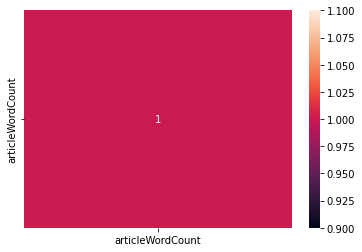

In [143]:
sns.heatmap(correlationA, xticklabels=correlationA.columns, yticklabels=correlationA.columns, annot=True)

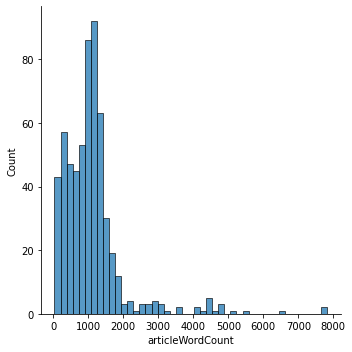

In [144]:
sns.displot(articles['articleWordCount'])

In [145]:
comments.to_csv(path_or_buf="data/cleanedCommentsM17.csv")
articles.to_csv(path_or_buf="data/cleanedArticlesM17.csv")

In [147]:
articlesData['newDesk'].value_counts()


Learning           71
National           69
Magazine           54
Games              42
Sports             42
Foreign            37
Dining             36
Science            36
Well               35
Upshot             34
Metro              27
Insider            23
Business           23
Culture            15
Travel             13
Metropolitan        7
RealEstate          6
SundayBusiness      5
Styles              3
Investigative       2
SpecialSections     2
Weekend             2
Arts&Leisure        2
NewsDesk            1
Summary             1
Name: newDesk, dtype: int64

In [148]:
articlesData['sectionName'].value_counts()


Unknown                       381
Politics                       44
Live                           24
Asia Pacific                   16
Family                         15
Europe                         11
Television                     11
Baseball                       10
Eat                             6
Move                            6
Mind                            6
College Basketball              6
Golf                            5
Soccer                          5
Lesson Plans                    5
Middle East                     4
Economy                         4
Art & Design                    3
Pro Football                    3
Pro Basketball                  3
Africa                          3
DealBook                        2
Media                           2
Tennis                          2
Rugby                           1
Retirement                      1
401(k)'s and Similar Plans      1
Energy & Environment            1
Personal Tech                   1
College Footba